<a href="https://colab.research.google.com/github/gabsouza1/provaPythonDLib/blob/main/Aula_PCA_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula prática: Análise de Componentes Principais (PCA) em python.

# Alunos: Gabriel Gustavo de Souza - 201920328
# Breno Pereira Goes - 202010402

In [1]:
# Importando a biblioteca pandas e a função fetch_olivetti_faces do scikit-learn
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [2]:
# Carregando o conjunto de dados Olivetti Faces
dataset = fetch_olivetti_faces()

# Exibindo as chaves do dicionário do conjunto de dados
print(dataset.keys())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
dict_keys(['data', 'images', 'target', 'DESCR'])


In [3]:
# Exibindo informações básicas sobre o conjunto de dados
print(dataset)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

In [4]:
# Exibindo a forma (shape) dos dados do conjunto (número de amostras e características)
print(dataset.data.shape)

(400, 4096)


In [5]:
# Exibindo os valores da primeira amostra de dados
print(dataset.data[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


In [6]:

# Redimensionando a primeira amostra de dados em uma matriz 64x64 para exibição
print(dataset.data[0].reshape(64, 64))

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


<Figure size 640x480 with 0 Axes>

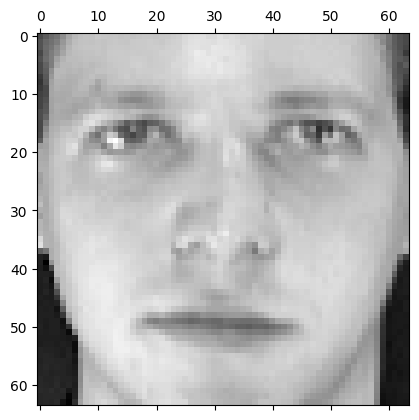

In [7]:
# Importando bibliotecas de plotagem e configurando a exibição em tons de cinza
from matplotlib import pyplot as plt
plt.gray()

# Exibindo a primeira imagem do conjunto de dados
plt.matshow(dataset.data[0].reshape(64, 64))

In [8]:
# Importando a biblioteca numpy
import numpy as np

# Exibindo o rótulo (target) da primeira amostra
print(dataset.target[0])

# Exibindo valores únicos dos rótulos no conjunto de dados
np.unique(dataset.target)

0


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [9]:
# Criando um DataFrame a partir dos dados do conjunto
df = pd.DataFrame(dataset.data)

# Exibindo as primeiras 4 linhas do DataFrame
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669


In [10]:
# Exibindo estatísticas descritivas do DataFrame
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


In [11]:
# Definindo X como os dados do DataFrame e y como os rótulos
X = df
y = dataset.target

In [12]:
# Importando o StandardScaler para padronizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Padronizando os dados
X_scaled = scaler.fit_transform(X)

# Exibindo os dados padronizados
print(X_scaled)


[[-0.49990332 -0.35118142 -0.3029615  ... -0.8982755  -0.8315196
  -0.8504569 ]
 [ 0.3014991   0.1946398   0.18568604 ... -0.8982755  -0.87658536
  -0.8733618 ]
 [-0.45410895 -0.17651856  0.07945839 ... -0.9643535  -0.89911824
  -0.8733618 ]
 ...
 [ 0.5533684   0.5221327   0.6743336  ... -0.7661195  -0.89911824
  -0.6672182 ]
 [-1.0265392  -1.137164   -1.3227473  ...  1.3483769   1.5118997
   1.6232662 ]
 [ 0.64495707  0.15097415 -1.0040643  ...  0.20302469  0.2275257
   0.4093096 ]]


In [13]:
# Importando a função train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Dividindo os dados padronizados em conjuntos de treinamento e teste (90% treinamento, 10% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=30)

In [14]:
# Importando o modelo de regressão linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Treinando o modelo de regressão linear com os dados de treinamento
model.fit(X_train, y_train)

# Calculando o score do modelo nos dados de teste
model.score(X_test, y_test)

0.7225857537426632

In [16]:
# Importando a Análise de Componentes Principais (PCA)
from sklearn.decomposition import PCA

# Criando um objeto PCA com 99% de variância explicada
pca = PCA(0.99)

# Aplicando PCA aos dados padronizados
X_pca = pca.fit_transform(X_scaled)

# Exibindo a forma dos dados após a aplicação do PCA
print(X_pca.shape)

(400, 260)


In [17]:
# Exibindo as razões de variância explicada pelas componentes principais
print(pca.explained_variance_ratio_)

[2.68764406e-01 1.23423822e-01 7.84141347e-02 4.68859263e-02
 3.24621238e-02 3.10077406e-02 2.38383431e-02 2.07172260e-02
 1.85786448e-02 1.64620820e-02 1.53415157e-02 1.35368817e-02
 1.23356255e-02 1.14392079e-02 1.09437155e-02 9.58187599e-03
 8.66955984e-03 7.93409348e-03 7.59309158e-03 7.19216978e-03
 6.73738075e-03 6.50818460e-03 5.94218448e-03 5.53783355e-03
 5.37188491e-03 5.13045583e-03 4.96437727e-03 4.72948002e-03
 4.21008281e-03 4.11466090e-03 3.94150522e-03 3.70270619e-03
 3.64517188e-03 3.34714330e-03 3.28651071e-03 3.18781473e-03
 3.08094244e-03 2.90794089e-03 2.84856791e-03 2.67690234e-03
 2.61093001e-03 2.52234330e-03 2.46819970e-03 2.45228154e-03
 2.33045686e-03 2.31185788e-03 2.22648541e-03 2.20349780e-03
 2.07817461e-03 2.05929112e-03 2.02611927e-03 1.95124722e-03
 1.89962250e-03 1.85050978e-03 1.79841334e-03 1.73564069e-03
 1.67686632e-03 1.64973631e-03 1.59084238e-03 1.57066376e-03
 1.55910221e-03 1.50777504e-03 1.48292852e-03 1.44788274e-03
 1.41908973e-03 1.394273

In [18]:
# Dividindo os dados PCA em conjuntos de treinamento e teste (70% treinamento, 30% teste)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=30)

# Criando um novo modelo de regressão linear usando os dados PCA
model_pca = LinearRegression()

# Treinando o modelo de regressão linear com os dados PCA de treinamento
model_pca.fit(X_train_pca, y_train)

# Calculando o score do modelo nos dados PCA de teste
model_pca.score(X_test_pca, y_test)


-4.240814882908142

# Exercícios:
 1. Modifique a quantidade de variância e gere vários treinamentos com PCAs diferentes;
 2. Utilize algum outro algoritmo de treinamento a sua escolha, e verifique o resultado que você consegue.